In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Set input/output dimensions
m = 7  # input size
p = 4  # output size

# Load training data
dataset_csv = pd.read_csv('dataset_xid_train_shuffle.csv', sep=',')
dataset = np.array(dataset_csv.iloc[:, 0:p + m])
X_train = torch.tensor(dataset[:, p:], dtype=torch.float32)
Y_train = torch.tensor(dataset[:, :p], dtype=torch.float32)

# Load validation data
dataset_csv_val = pd.read_csv('dataset_xid_val_shuffle.csv', sep=',')
dataset_val = np.array(dataset_csv_val.iloc[:, 0:p + m])
X_val = torch.tensor(dataset_val[:, p:], dtype=torch.float32)
Y_val = torch.tensor(dataset_val[:, :p], dtype=torch.float32)


In [2]:
# Define deep MLP with tanh and 5x5 architecture, no bias
class DeepMLPNoBias(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(m, 32, bias=False),
            nn.Tanh(),
            nn.Linear(32, 32, bias=False),
            nn.Tanh(),
            nn.Linear(32, p, bias=False)
        )

    def forward(self, x):
        return self.net(x)


In [3]:
# Instantiate model, loss, optimizer
model = DeepMLPNoBias()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Prepare data loaders
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, Y_val), batch_size=64)


In [4]:
# Containers for losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(800):
    model.train()
    train_loss_epoch = 0
    for x_batch, y_batch in train_loader:
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item()
    train_losses.append(train_loss_epoch / len(train_loader))

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss_epoch = sum(criterion(model(x), y).item() for x, y in val_loader) / len(val_loader)
    val_losses.append(val_loss_epoch)

    print(f"Epoch {epoch + 1}, Train Loss: {train_losses[-1]:.6f}, Validation Loss: {val_losses[-1]:.6f}")


Epoch 1, Train Loss: 0.066468, Validation Loss: 0.060575
Epoch 2, Train Loss: 0.060254, Validation Loss: 0.057277
Epoch 3, Train Loss: 0.056500, Validation Loss: 0.053005
Epoch 4, Train Loss: 0.050593, Validation Loss: 0.046901
Epoch 5, Train Loss: 0.045676, Validation Loss: 0.043802
Epoch 6, Train Loss: 0.043939, Validation Loss: 0.044346
Epoch 7, Train Loss: 0.042684, Validation Loss: 0.042355
Epoch 8, Train Loss: 0.041832, Validation Loss: 0.040786
Epoch 9, Train Loss: 0.041049, Validation Loss: 0.040338
Epoch 10, Train Loss: 0.040511, Validation Loss: 0.040318
Epoch 11, Train Loss: 0.040041, Validation Loss: 0.038937
Epoch 12, Train Loss: 0.039050, Validation Loss: 0.038475
Epoch 13, Train Loss: 0.038180, Validation Loss: 0.037708
Epoch 14, Train Loss: 0.037298, Validation Loss: 0.037218
Epoch 15, Train Loss: 0.036740, Validation Loss: 0.036264
Epoch 16, Train Loss: 0.035991, Validation Loss: 0.035577
Epoch 17, Train Loss: 0.035576, Validation Loss: 0.035021
Epoch 18, Train Loss: 0

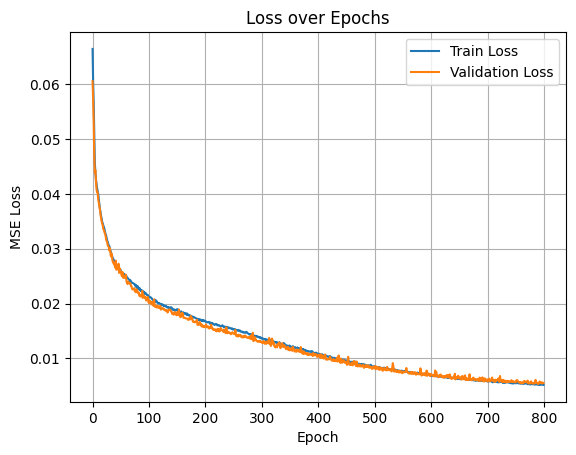

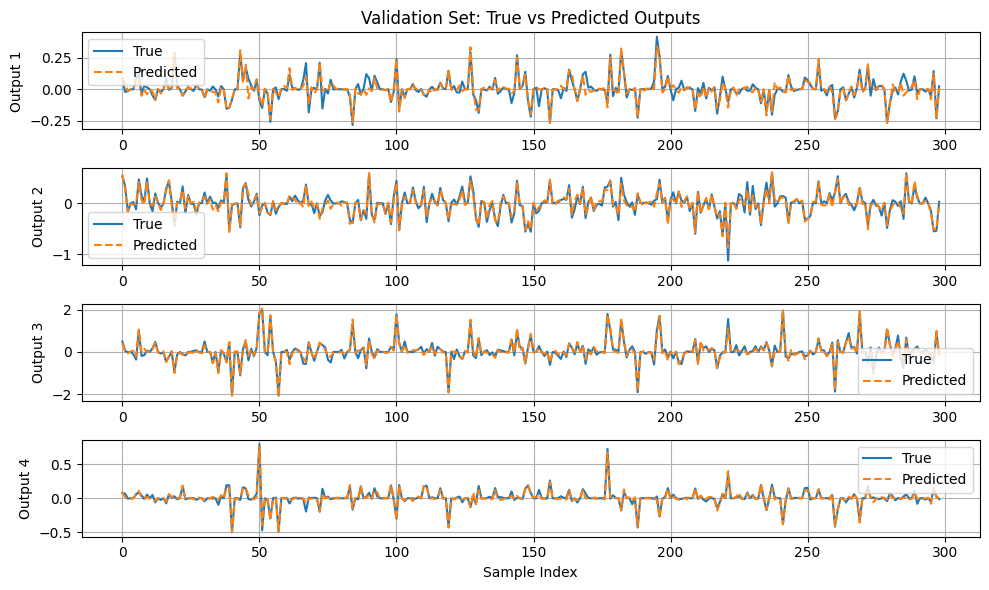

In [5]:
# === PLOTS ===
# Loss over epochs
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Predicted vs true output on validation set
model.eval()
with torch.no_grad():
    Y_pred_val = model(X_val).numpy()
    Y_true_val = Y_val.numpy()

plt.figure(figsize=(10, 6))
for i in range(p):
    plt.subplot(p, 1, i + 1)
    plt.plot(Y_true_val[1:300, i], label='True')
    plt.plot(Y_pred_val[1:300, i], label='Predicted', linestyle='--')
    plt.ylabel(f'Output {i + 1}')
    if i == 0:
        plt.title("Validation Set: True vs Predicted Outputs")
    if i == p - 1:
        plt.xlabel("Sample Index")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()